In [55]:
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing as prep

# other utilities
from sklearn import datasets, preprocessing, metrics

In [2]:
wqw = pd.read_excel('./winequality-white.xlsx', skiprows=1, index_col=None, na_values=['NA'])

In [3]:
wqw.shape

(4898, 12)

In [4]:
wqw.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2105,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5
4485,6.7,0.31,0.33,2.0,0.033,12.0,74.0,0.99064,3.29,0.65,12.5,6
3398,6.1,0.33,0.32,7.8,0.052,52.0,183.0,0.99657,3.39,0.65,9.5,5
1046,6.5,0.19,0.10,1.3,0.046,23.0,107.0,0.99370,3.29,0.45,10.0,5
4712,5.7,0.27,0.16,9.0,0.053,32.0,111.0,0.99474,3.36,0.37,10.4,6
4272,5.7,0.22,0.20,16.0,0.044,41.0,113.0,0.99862,3.22,0.46,8.9,6
788,5.8,0.34,0.16,7.0,0.037,26.0,116.0,0.99490,3.46,0.45,10.0,7
4009,6.8,0.22,0.32,5.9,0.054,40.0,152.0,0.99380,3.20,0.57,10.8,6
3038,6.5,0.23,0.45,2.1,0.027,43.0,104.0,0.99054,3.02,0.52,11.3,6
2840,6.5,0.37,0.33,3.5,0.036,23.0,92.0,0.99136,3.18,0.38,11.2,6


In [5]:
wqr = pd.read_excel('./winequality-red.xlsx', skiprows=1, index_col=None, na_values=['NA'])

In [6]:
wqr.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1446,6.9,0.630,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.800000,5
332,8.0,0.580,0.28,3.2,0.066,21.0,114.0,0.99730,3.22,0.54,9.400000,6
768,7.1,0.590,0.02,2.3,0.082,24.0,94.0,0.99744,3.55,0.53,9.700000,6
1571,6.4,0.380,0.14,2.2,0.038,15.0,25.0,0.99514,3.44,0.65,11.100000,6
491,9.2,0.410,0.50,2.5,0.055,12.0,25.0,0.99520,3.34,0.79,13.300000,7
921,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.000000,6
368,10.3,0.340,0.52,2.8,0.159,15.0,75.0,0.99980,3.18,0.64,9.400000,5
1475,5.3,0.470,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.566667,7
118,8.8,0.550,0.04,2.2,0.119,14.0,56.0,0.99620,3.21,0.60,10.900000,6
1542,6.7,0.855,0.02,1.9,0.064,29.0,38.0,0.99472,3.30,0.56,10.750000,6


In [7]:
wqw.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
wqr.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
wqr['type']=0
wqw['type']=1

In [10]:
wine = pd.concat([wqw, wqr], ignore_index=True)

In [11]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [12]:
wine.sample(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
477,7.0,0.220,0.28,1.5,0.037,29.0,115.0,0.99270,3.11,0.55,10.50,6,1
2323,7.6,0.200,0.34,1.8,0.041,42.0,148.0,0.99335,3.35,0.66,11.10,6,1
2486,6.7,0.240,0.32,10.3,0.079,37.0,122.0,0.99662,3.02,0.45,8.80,5,1
2157,8.5,0.250,0.27,4.7,0.031,31.0,92.0,0.99220,3.01,0.33,12.00,6,1
5003,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.20,5,0
2316,7.4,0.200,0.31,1.6,0.038,34.0,116.0,0.99120,3.25,0.39,12.00,7,1
104,7.4,0.250,0.37,13.5,0.060,52.0,192.0,0.99750,3.00,0.44,9.10,5,1
4503,5.8,0.610,0.01,8.4,0.041,31.0,104.0,0.99090,3.26,0.72,14.05,7,1
3332,6.5,0.220,0.28,3.7,0.059,29.0,151.0,0.99177,3.23,0.41,12.10,7,1
4789,5.5,0.620,0.33,1.7,0.037,24.0,118.0,0.98758,3.15,0.39,13.55,6,1


In [13]:
wine.shape

(6497, 13)

In [14]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [17]:
wine.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
6494,6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


<Axes: >

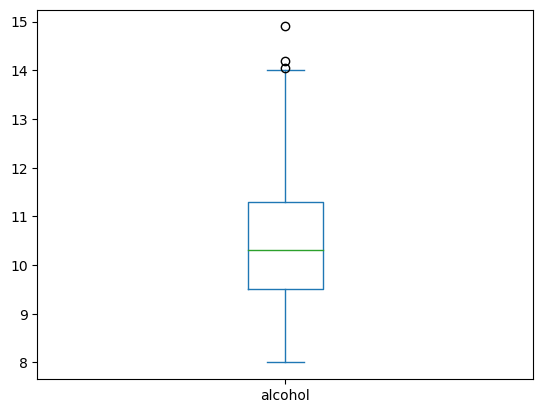

In [18]:
wine.alcohol.plot.box()

In [19]:
fw = wine[wine['alcohol'] > 14]
fw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3918,6.4,0.35,0.28,1.6,0.037,31.0,113.0,0.98779,3.12,0.40,14.20,7,1
4503,5.8,0.61,0.01,8.4,0.041,31.0,104.0,0.99090,3.26,0.72,14.05,7,1
5550,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.90,5,0


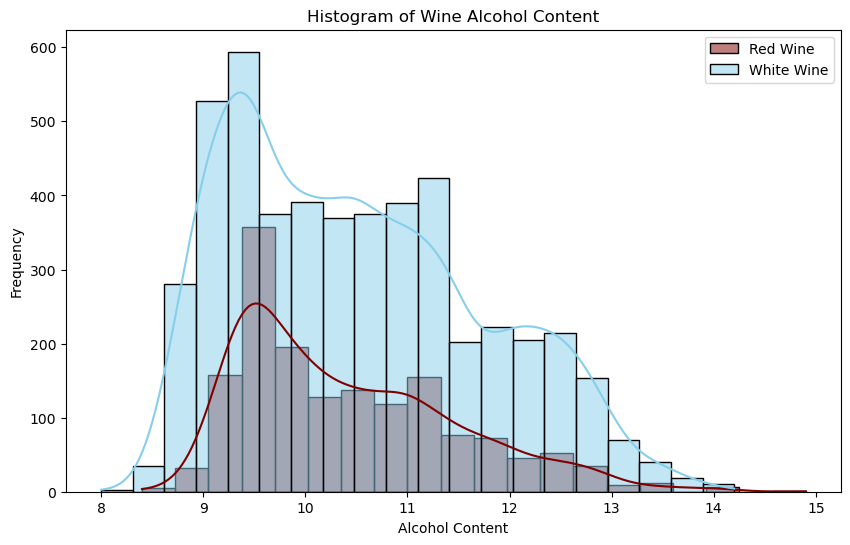

In [20]:
plt.figure(figsize=(10, 6))

sns.histplot(wine[wine['type'] == 0]['alcohol'], kde=True, bins=20, color='maroon', label='Red Wine')
sns.histplot(wine[wine['type'] == 1]['alcohol'], kde=True, bins=20, color='skyblue', label='White Wine')

plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.title('Histogram of Wine Alcohol Content')
plt.legend()

plt.show()

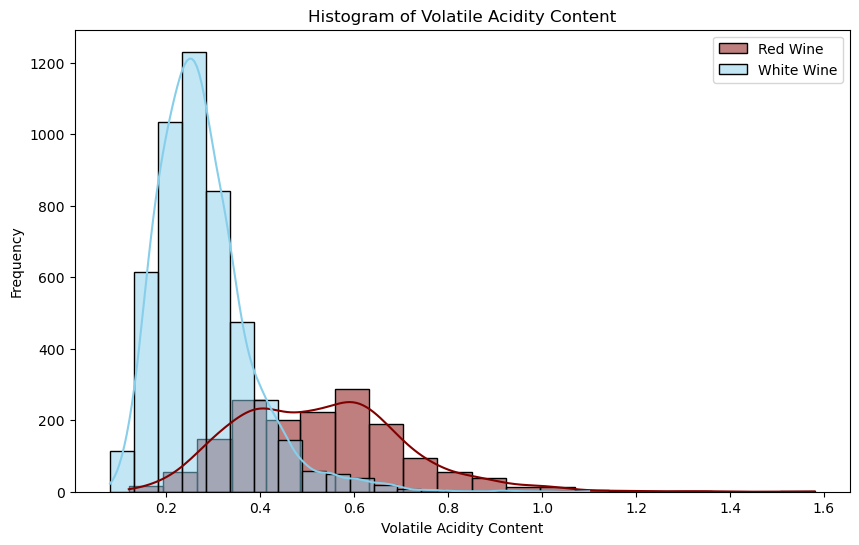

In [21]:
plt.figure(figsize=(10, 6))

sns.histplot(wine[wine['type'] == 0]['volatile acidity'], kde=True, bins=20, color='maroon', label='Red Wine')
sns.histplot(wine[wine['type'] == 1]['volatile acidity'], kde=True, bins=20, color='skyblue', label='White Wine')

plt.xlabel('Volatile Acidity Content')
plt.ylabel('Frequency')
plt.title('Histogram of Volatile Acidity Content')
plt.legend()

plt.show()

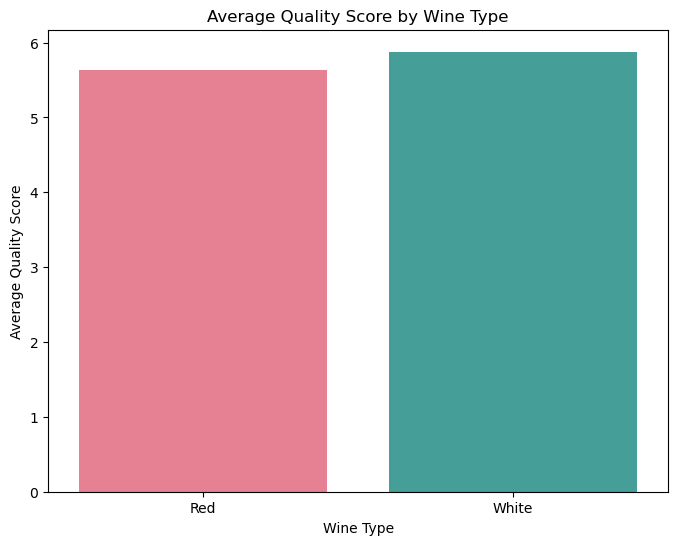

In [22]:
avg_quality_by_type = wine.groupby('type')['quality'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_quality_by_type, x='type', y='quality', palette='husl')
plt.xlabel('Wine Type')
plt.ylabel('Average Quality Score')
plt.title('Average Quality Score by Wine Type')
plt.xticks(ticks=[0, 1], labels=['Red', 'White'])

plt.show()

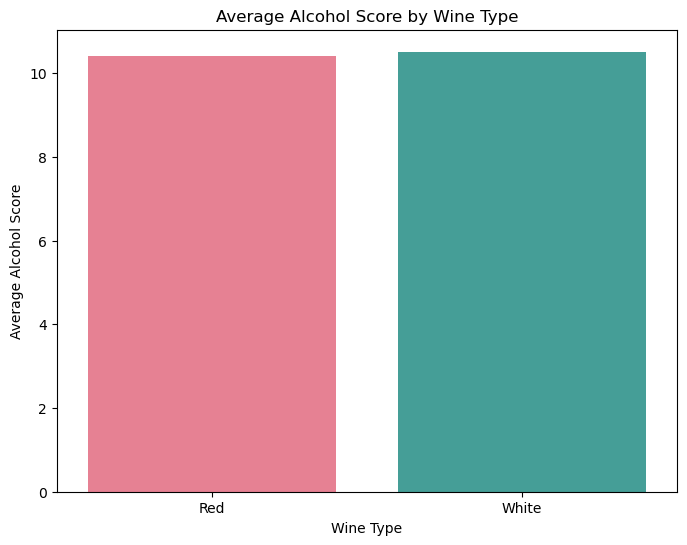

In [23]:
avg_alcohol_by_type = wine.groupby('type')['alcohol'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_alcohol_by_type, x='type', y='alcohol', palette='husl')
plt.xlabel('Wine Type')
plt.ylabel('Average Alcohol Score')
plt.title('Average Alcohol Score by Wine Type')
plt.xticks(ticks=[0, 1], labels=['Red', 'White'])

plt.show()

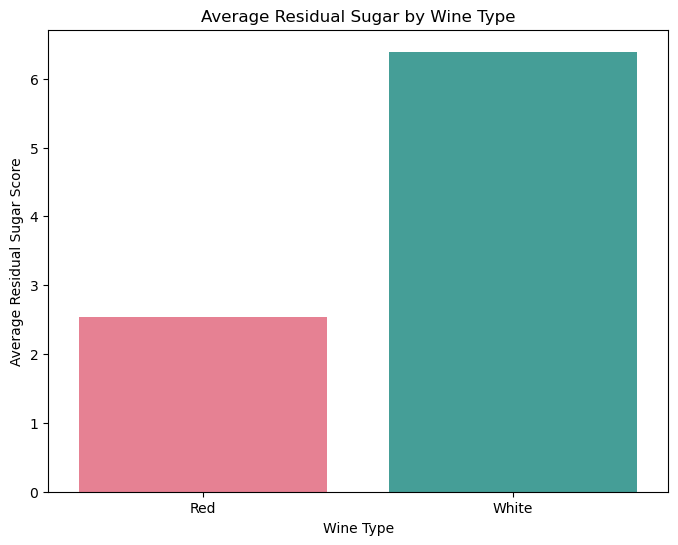

In [24]:
avg_residualSugar_by_type = wine.groupby('type')['residual sugar'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_residualSugar_by_type, x='type', y='residual sugar', palette='husl')
plt.xlabel('Wine Type')
plt.ylabel('Average Residual Sugar Score')
plt.title('Average Residual Sugar by Wine Type')
plt.xticks(ticks=[0, 1], labels=['Red', 'White'])

plt.show()

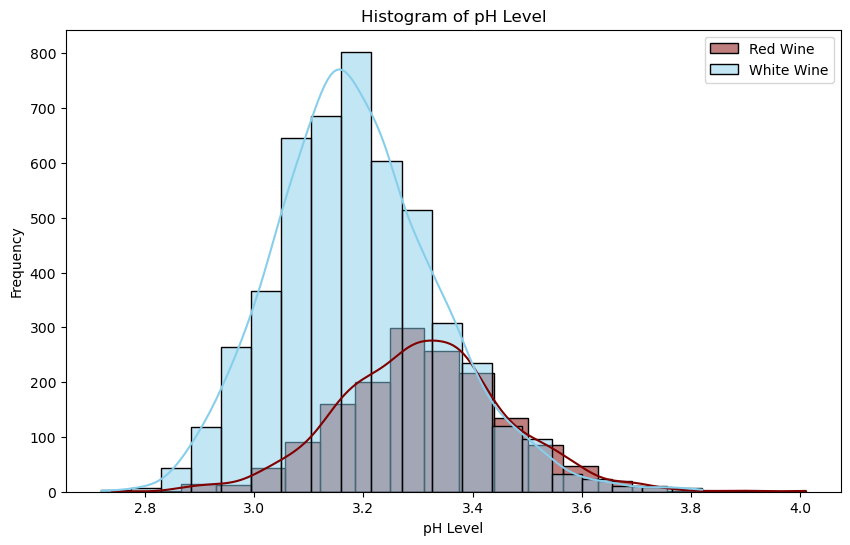

In [25]:
plt.figure(figsize=(10, 6))

sns.histplot(wine[wine['type'] == 0]['pH'], kde=True, bins=20, color='maroon', label='Red Wine')
sns.histplot(wine[wine['type'] == 1]['pH'], kde=True, bins=20, color='skyblue', label='White Wine')

plt.xlabel('pH Level')
plt.ylabel('Frequency')
plt.title('Histogram of pH Level')
plt.legend()

plt.show()

In [26]:
qualityCorr = wine[['quality', 'alcohol']]
qualityCorr.corr()

,quality,alcohol
quality,1.000000,0.444319
alcohol,0.444319,1.000000


In [27]:
qualityCorr = wine[['quality', 'density']]
qualityCorr.corr()

,quality,density
quality,1.000000,-0.305858
density,-0.305858,1.000000


<Axes: >

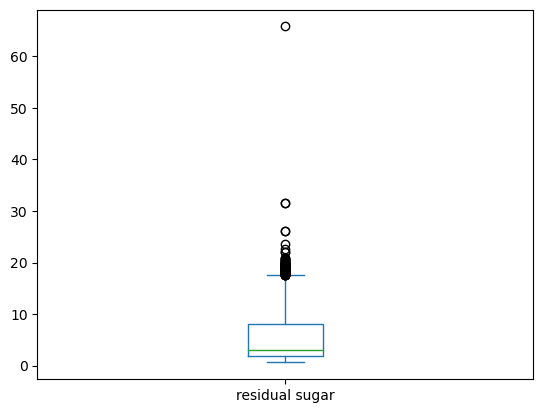

In [28]:
wine['residual sugar'].plot.box()

In [29]:
residualSugar = wine['residual sugar'].sort_values(ascending = False)
residualSugar.head(5)

2781    65.80
1663    31.60
1653    31.60
3623    26.05
3619    26.05
Name: residual sugar, dtype: float64

In [33]:
#wine= wine.drop(2781)
#wine.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6492,6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
6493,6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6494,6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


Text(0.5, 1.0, 'Histogram of pH Values')

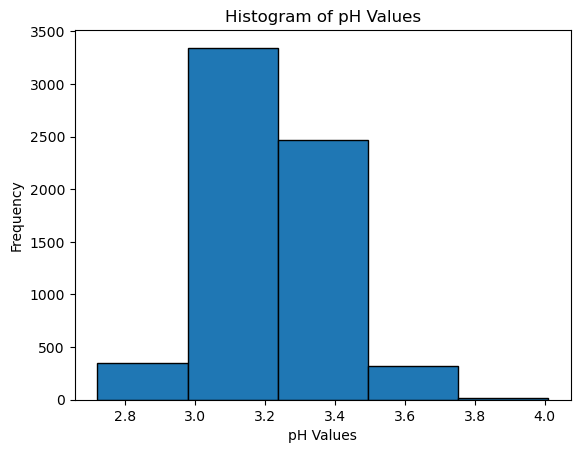

In [31]:
pH_values= wine['pH']
num_bins = 5 
bin_edges = np.linspace(wine['pH'].min(), wine['pH'].max(), num_bins + 1)
plt.hist(pH_values, bins=bin_edges, edgecolor='black')
plt.xlabel('pH Values')
plt.ylabel('Frequency')
plt.title('Histogram of pH Values')


Text(0.5, 1.0, 'Histogram of pH Values')

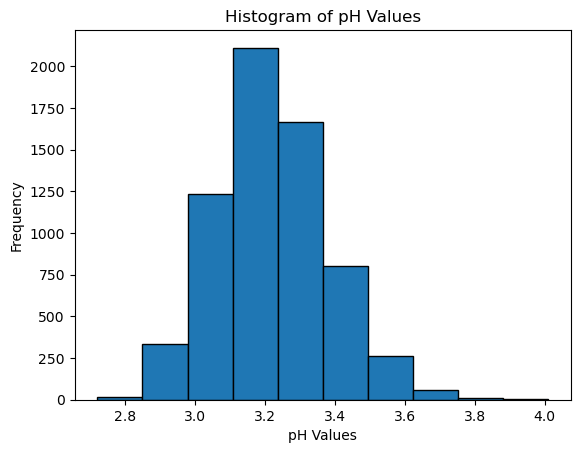

In [32]:
pH_values= wine['pH']
num_bins = 10
bin_edges = np.linspace(wine['pH'].min(), wine['pH'].max(), num_bins + 1)
plt.hist(pH_values, bins=bin_edges, edgecolor='black')
plt.xlabel('pH Values')
plt.ylabel('Frequency')
plt.title('Histogram of pH Values')

In [45]:
winecorr=wine.corr()

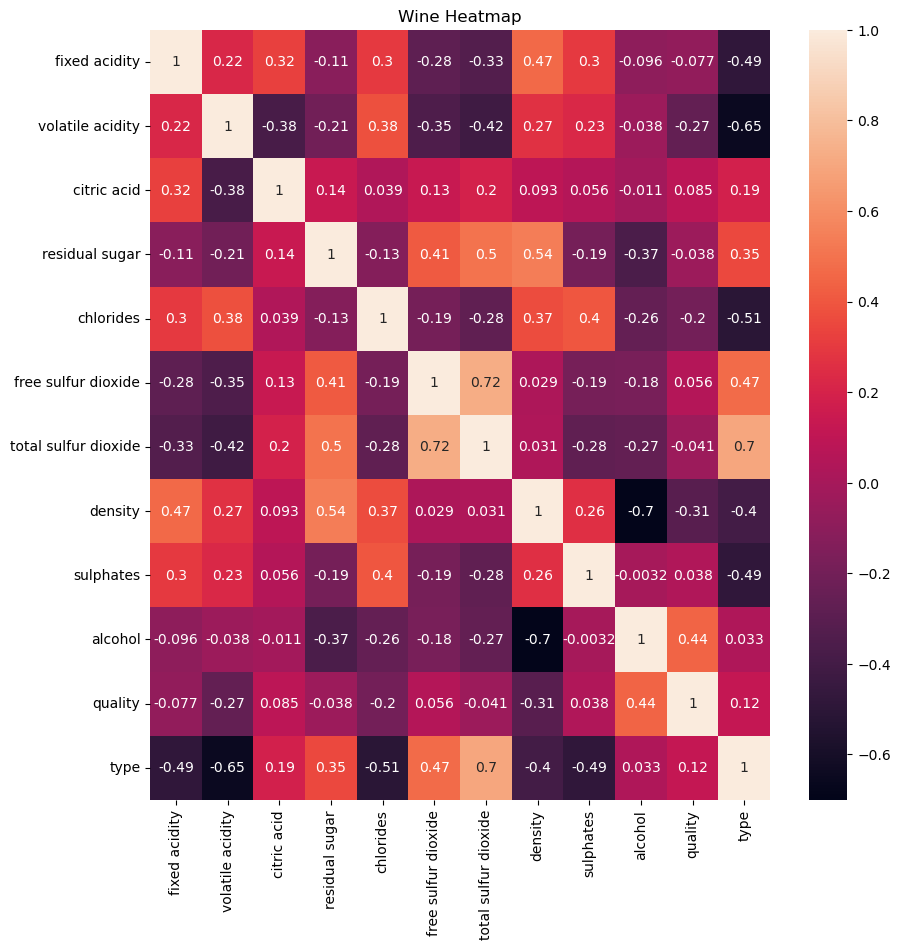

In [49]:
plt.figure(figsize = (10,10))
sns.heatmap(winecorr, annot=True)

plt.title('Wine Heatmap')

plt.show()

In [44]:
wine = wine.drop('pH', axis = 1)

In [52]:
wine = wine.drop('type', axis = 1)
values = wine.values
values

array([[ 7.   ,  0.27 ,  0.36 , ...,  0.45 ,  8.8  ,  6.   ],
       [ 6.3  ,  0.3  ,  0.34 , ...,  0.49 ,  9.5  ,  6.   ],
       [ 8.1  ,  0.28 ,  0.4  , ...,  0.44 , 10.1  ,  6.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [56]:
 from sklearn.preprocessing import StandardScaler
normalized_values = prep.normalize(values, norm = 'l1')
normalized_values

array([[0.02696186, 0.00103996, 0.00138661, ..., 0.00173326, 0.03389491,
        0.02311017],
       [0.03671906, 0.00174853, 0.00198166, ..., 0.00285593, 0.05537002,
        0.03497054],
       [0.05054126, 0.00174711, 0.00249586, ..., 0.00274545, 0.06302058,
        0.03743797],
       ...,
       [0.06490714, 0.00525439, 0.00133935, ..., 0.00772704, 0.11332993,
        0.06181632],
       [0.05804489, 0.00634559, 0.00118057, ..., 0.00698506, 0.10034879,
        0.04919058],
       [0.06733819, 0.00347914, 0.00527482, ..., 0.0074072 , 0.12345334,
        0.06733819]])

In [58]:
np.mean(normalized_values)

0.09090909090909091

In [60]:
np.std(normalized_values)

0.1785758841459483

[8.14793321e-01 1.54181661e-01 2.20965499e-02 6.96378582e-03
 1.66032622e-03 1.75616959e-04 7.80408444e-05 3.29593651e-05
 1.42583647e-05 3.48024253e-06 3.86374119e-32]


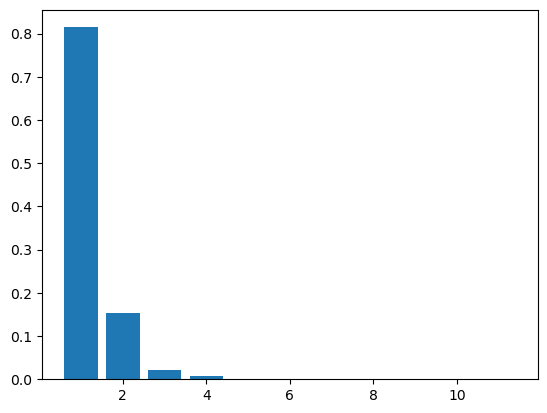

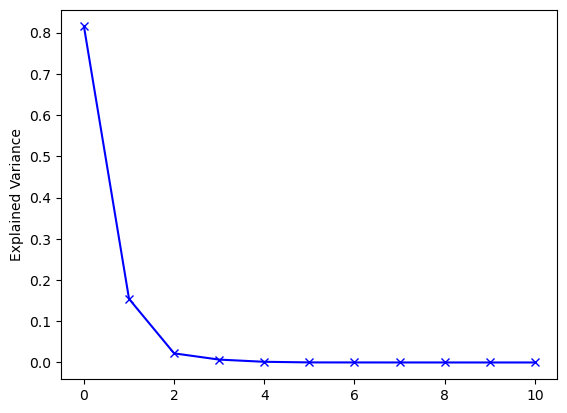

In [62]:
normalized_wine = pd.DataFrame(normalized_values, columns = wine.columns)
from sklearn.decomposition import PCA 
c = 11
pca = PCA(n_components = c)
pca.fit_transform(normalized_wine)
print(pca.explained_variance_ratio_)
plt.bar(range(1,c+1), pca.explained_variance_ratio_)
plt.show()
plt.plot(pca.explained_variance_ratio_, 'bx-')
plt.ylabel('Explained Variance')
plt.show()

In [64]:
c = 3
pca_final = PCA(n_components = c)
pca_wine = pca_final.fit_transform(normalized_wine)
normalized_wine = pd.DataFrame(pca_wine, columns=['PC 1','PC 2','PC 3'])
normalized_wine.sample(10)

,PC 1,PC 2,PC 3
4072,-0.137701,-0.095720,-0.021179
5293,0.039553,0.152056,0.009757
4430,0.043258,-0.023665,-0.012234
5265,0.000551,-0.046852,-0.007153
1530,-0.053937,0.040132,0.028209
1018,-0.075278,0.040170,-0.022291
886,-0.111611,-0.004194,-0.022233
2367,-0.117878,-0.008936,0.005374
5362,0.254070,-0.024343,0.007478
4020,-0.019550,0.056132,-0.022378
